# Homework 4:  Linear models

This homework assignment is designed to give you practice with linear models and the bias-variance tradeoff. 

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 


This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`), Flanker Task performance (`Flanker_Unadj`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [1]:
setwd("~/Downloads")
DATA = read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")

install.packages("tidyverse")
library(tidyverse)
d1 = select(DATA, c('Subject', 'Gender', 'Flanker_Unadj', 'FS_Tot_WM_Vol', 'FS_Total_GM_Vol'))
d1 = na.omit(d1)
head(d1)


The downloaded binary packages are in
	/var/folders/3w/m1hxgx4d3g38l_05xm_y1b700000gn/T//RtmppSaVkm/downloaded_packages


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<int>,<int>
2,100206,M,130.42,543134,807245
3,100307,F,112.56,407292,664124
4,100408,M,121.18,500417,726206
5,100610,M,126.53,512946,762308
6,101006,F,101.85,429449,579632
7,101107,M,107.04,416995,665024


---
## 2. Initial data visualization (2 point)

Use the `pairs` function to look at all the pairwise scatterplots of the variables in `d1`. Describe which variables seem positively correlated, negatively correlated, or not correlated at all.

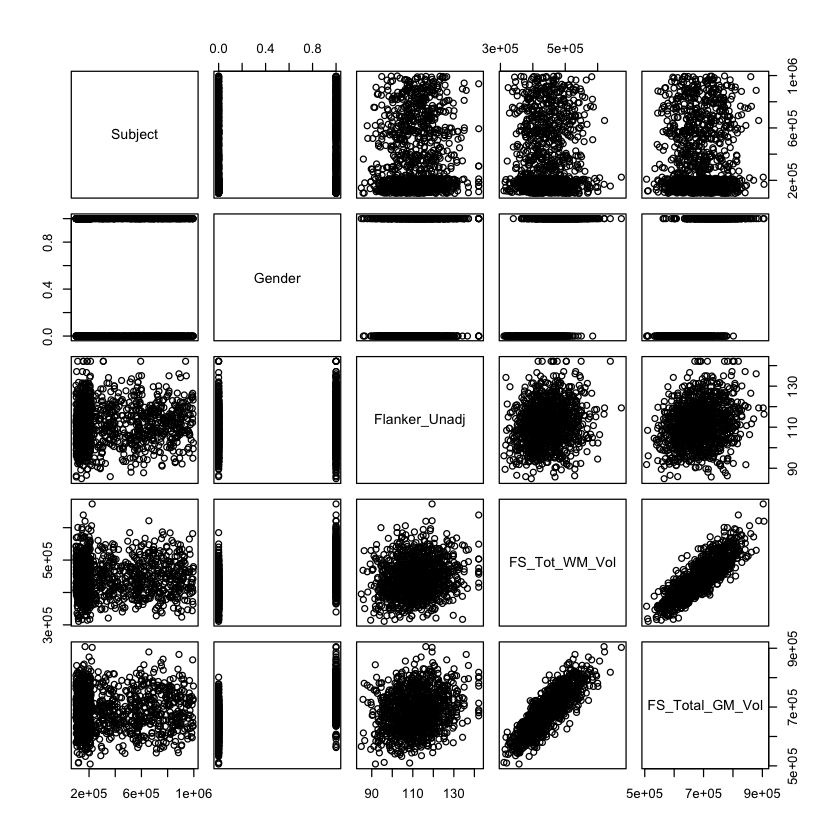

In [2]:
d1$Gender = gsub('F', '0', d1$Gender)
d1$Gender = gsub('M', '1', d1$Gender)
d1$Gender = as.numeric(d1$Gender)

pairs(d1)

> It seems that Gender is not correlated at all with any of the variables. It seems that Subject is not correlated with any of the vairables either. There are no negative correlations between variables. There is a positive correlation between total white matter volume and total grey matter volume.
> 

---
## 3. Linear regression (4 points)

Use the `lm` (linear model) function to determine the association between Flanker Task performance and total grey matter volume from the `d1` data frame.

$$
Y_{flanker} = \beta_0 + \beta_1 X_{GM volume}
$$

Show the results using the `summary` function, and report the mean coefficient values for $beta_0$ \& $\beta_1$ (`coef` function) and their 95\% confidence intervals (`confint` function). Is grey matter volume significantly associated with Flanker Task performance?

In [3]:
fit = lm(Flanker_Unadj ~ FS_Total_GM_Vol, d1)
summary(fit)
coef(fit)
confint(fit, level = 0.95)


Call:
lm(formula = Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2280  -6.5969  -0.0119   6.5497  31.0108 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.026e+01  3.041e+00  29.677  < 2e-16 ***
FS_Total_GM_Vol 3.110e-05  4.412e-06   7.048 3.18e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.864 on 1111 degrees of freedom
Multiple R-squared:  0.0428,	Adjusted R-squared:  0.04194 
F-statistic: 49.68 on 1 and 1111 DF,  p-value: 3.177e-12


(Intercept) FS_Total_GM_Vol 
   9.025646e+01    3.109965e-05

,2.5 %,97.5 %
(Intercept),8.428917e+01,9.622375e+01
FS_Total_GM_Vol,2.244198e-05,3.975733e-05


> Grey matter volume is not significantly associated with Flanker Task performance

---
## 4. Plotting (2 points)

Use `ggplot` to plot the `FS_Total_GM_Vol` variable (x axis) against the `Flanker_Unadj` variable (y axis), as well as the regression line with confidence intervals on the regrssion line. Qualitatively describe what you see. 


The downloaded binary packages are in
	/var/folders/3w/m1hxgx4d3g38l_05xm_y1b700000gn/T//RtmppSaVkm/downloaded_packages


`geom_smooth()` using formula 'y ~ x'



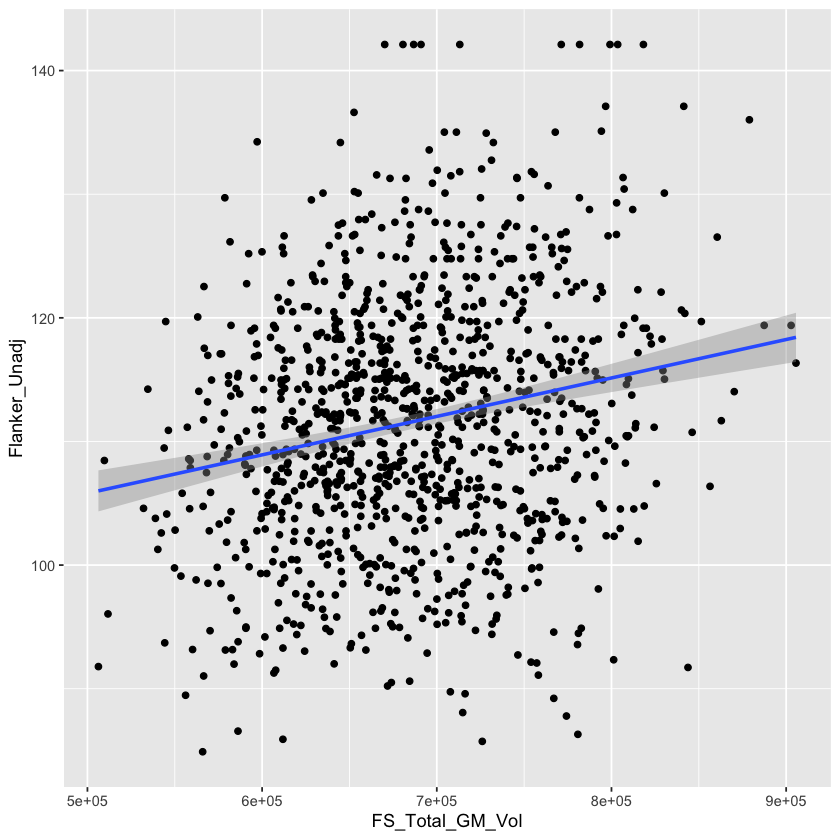

In [4]:
install.packages("ggplot2")
library(ggplot2)

ggplot(d1, aes(x=FS_Total_GM_Vol, y=Flanker_Unadj)) + 
  geom_point()+
  geom_smooth(method="lm", se=TRUE, fullrange=FALSE, level=0.95)

> The points are all spread out and do not form a holistic trend in any direction (only a slightly positive slope for the regression line which can be seen in the plot above). Therefore, along with what we have already seen, there seems to be no significant correlation between the total grey matter volume and the flanker task performance. 
> 

---

## 5. Reflection (1 point)

What do you conclude based on the analyses above?

> We conclude that there no significant correlation between the total grey matter volume and the Flanker Task performance. 

**DUE:** 5pm EST, March 4, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*